In [60]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator, ScalarFormatter

Merge all csv from year 2018-2023

In [61]:
files = ['../Data/parkdata/Park2018.csv', 
         '../Data/parkdata/Park2019.csv', 
         '../Data/parkdata/Park2020.csv', 
         '../Data/parkdata/Park2021.csv', 
         '../Data/parkdata/Park2022.csv', 
         '../Data/parkdata/Park2023.csv']

In [62]:
dfs = []
for file in files:
    df = pd.read_csv(file)
    year = int(file.split('Park')[1].split('.csv')[0])
    df['Year']= year
    dfs.append(df)

In [63]:
parkdata_merged_df = pd.concat(dfs, ignore_index=True)

In [64]:
parkdata_merged_df.to_csv('../merged_Parks_with_year.csv', index=False)

In [65]:
parkdata_merged_df.rename(columns={'\t\nPark':'Park'})

,State,Park,Recreation Visitors,RecreationPercent Change,Recreation Visitor Days,RecreationVisitorsDaysPercent Change,Non-recreation Visitors,Non-recreation VisitorsPercent Change,RecreationVisitorHours,RecreationVisitorHoursPercent Change,...,TentOvernightsPercent Change,RecreationVehicleOvernights,RecreationVehicleOvernightsPercent Change,BackcountryOvernights,BackcountryOvernightsPercent Change,NonRecreationOvernights,NonRecreationOvernightsPercent Change,MiscellaneousOvernights,MiscellaneousOvernightsPercent Change,Year
0,Alabama,Horseshoe Bend NMP,"48,491",-34.70%,"9,422",-37.22%,"1,080,115",6.51%,"113,067",-37.22%,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,2018
1,Alabama,Little River Canyon NPRES,"441,177",20.19%,"105,578",31.35%,0,NaN,"1,266,940",31.35%,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,2018
2,Alabama,Natchez Trace PKWY,"445,372",0.58%,"149,455",0.54%,"628,087",2.46%,"1,793,468",0.54%,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,2018
3,Alabama,Russell Cave NM,"21,620",-11.31%,"2,999",-7.52%,0,NaN,"35,991",-7.54%,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,2018
4,Alabama,Tuskegee Airmen NHS,"26,829",-31.77%,"3,353",-31.78%,0,NaN,"40,243",-31.77%,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460,Wyoming,Fort Laramie NHS,"47,155",18.91%,"6,081",22.68%,0,-100.00%,"72,979",22.68%,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,2023
2461,Wyoming,Fossil Butte NM,"19,377",8.38%,"2,468",9.01%,225,-30.77%,"29,627",9.02%,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,2023
2462,Wyoming,Grand Teton NP,"3,417,106",21.77%,"1,817,854",4.45%,"1,570,845",2.22%,"21,814,250",4.45%,...,NaN,0,NaN,"41,705",4.24%,0,NaN,0,NaN,2023
2463,Wyoming,"John D. Rockefeller, Jr. MEM PKWY","1,382,345",26.68%,"183,159",-13.48%,"10,800",0.00%,"2,197,917",-13.48%,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,2023


In [66]:
parkdata_merged_df.to_csv('allparkdata.csv')

How has visitation to parks changed from 2018 to 2024?

In [67]:
parkdata_merged_df['Recreation Visitors'] = parkdata_merged_df['Recreation Visitors'].replace({',': ''}, regex=True)

parkdata_merged_df['Recreation Visitors'] = pd.to_numeric(parkdata_merged_df['Recreation Visitors'], errors='coerce')

grouped_parkdata = parkdata_merged_df.groupby('Year')['Recreation Visitors'].sum().reset_index()

In [68]:
grouped_parkdata.astype('int')

,Year,Recreation Visitors
0,2018,318183206
1,2019,327516623
2,2020,237064318
3,2021,297115401
4,2022,311986008
5,2023,325498650


Top Five parks by the number of recreation visitors ?

In [69]:
parkdata_merged_df['Recreation Visitors'] = parkdata_merged_df['Recreation Visitors'].replace({',': ''}, regex=True)
parkdata_merged_df['Recreation Visitors'] = pd.to_numeric(parkdata_merged_df['Recreation Visitors'], errors='coerce')

top_parks_by_year = parkdata_merged_df.groupby(['Year', '\t\nPark'])['Recreation Visitors'].sum().reset_index()
top_parks_by_year_sorted = top_parks_by_year.sort_values(by=['Year', 'Recreation Visitors'], ascending=[True, False])
top_5_parks_by_year = top_parks_by_year_sorted.groupby('Year').head(5)

top_5_parks_by_year.rename(columns={'\t\nPark':'Park'})
top_5_parks_by_year.to_csv('top5park.csv',index=False)

How has visitation changed by state over the years?

In [70]:
grouped_by_state = parkdata_merged_df.groupby(['Year', 'State'])['Recreation Visitors'].sum().reset_index()
grouped_by_state_Tennessee = grouped_by_state[grouped_by_state['State'] == 'Tennessee']
grouped_by_state_Tennessee

,Year,State,Recreation Visitors
43,2018,Tennessee,9256335.0
97,2019,Tennessee,9979139.0
151,2020,Tennessee,9672075.0
205,2021,Tennessee,11030447.0
259,2022,Tennessee,10407085.0
314,2023,Tennessee,10545649.0


Analyze and identify seasonal visitation patterns for different national parks between 2018 and 2023, and understand trends and patterns in visitor behavior across various seasons?

In [71]:
seasondata=pd.read_csv('../data/parkdata/seasonparkdata.csv')
seasondata=pd.DataFrame(seasondata)

In [72]:
sorted_seasondata = seasondata.groupby(["Year", "Month"])["Value"].first().unstack(fill_value=0)
sorted_seasondata = sorted_seasondata.replace({',': ''}, regex=True)  
sorted_seasondata = sorted_seasondata.astype(int) 
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
sorted_seasondata = sorted_seasondata[month_order]
sorted_seasondata 

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2018,12635938,13822694,21035485,25889186,32211085,39331983,44636360,39182620,31323509,26474952,17774444,13893577
2019,10421017,13234605,21419934,27448441,32363533,41731441,45230730,40784074,32489175,27559388,19269040,15565241
2020,13759386,14654517,15097065,7932427,14045693,25067367,33048198,31936680,27044922,24213004,16578733,13686340
2021,11978413,11692967,18370611,22155245,27963739,36122392,41329530,35380986,30204635,26961779,18903397,16051712
2022,12182742,13951368,22265903,25596156,29728988,37538075,41036723,36060607,30877727,28282686,18936294,15528729
2023,13636466,14895900,22215789,26383797,31859672,38753491,42463634,37500130,32418448,29636427,19441371,16293521


In [74]:
sorted_seasondata.to_csv('../data/sorted_seasondata.csv', index=False)

Monthly Park Visit Trends by Year

C:\Users\Sharv-Abhi-Priya\AppData\Local\Temp\ipykernel_5500\2742106908.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(x/1e6)}M' for x in ax.get_yticks()])


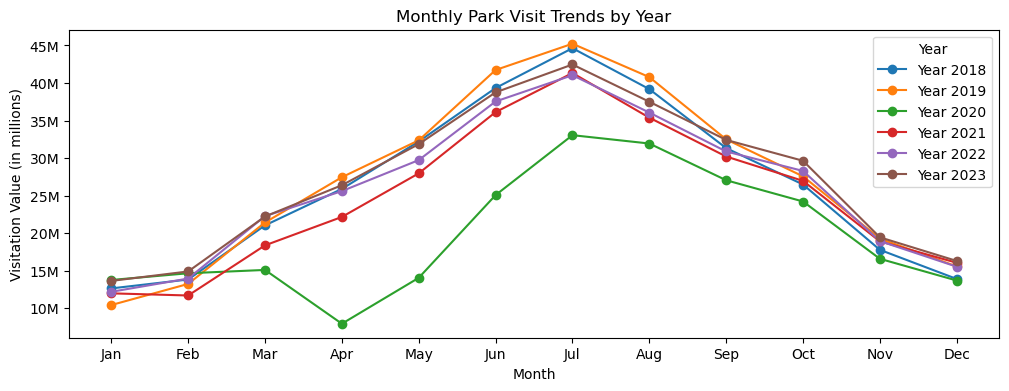

In [75]:
plt.figure(figsize = (12,4))
for year in sorted_seasondata.index:
    plt.plot(sorted_seasondata.columns, sorted_seasondata.loc[year], marker='o', label=f"Year {year}")
plt.title('Monthly Park Visit Trends by Year')
plt.xlabel('Month')
plt.ylabel('Visitation Value (in millions)')
ax = plt.gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.set_yticklabels([f'{int(x/1e6)}M' for x in ax.get_yticks()])
plt.legend(title="Year")
plt.show()

Add season column

In [76]:
for loop1, row in seasondata.iterrows():
    if row.Month in ['Mar', 'Apr', 'May']:
        seasondata.loc[loop1, 'Season'] = 'spring'
        
    elif row.Month in ['Jun', 'Jul', 'Aug']:
        seasondata.loc[loop1, 'Season'] = 'summer'
    
    elif row.Month in ['Sep', 'Oct', 'Nov']:
        seasondata.loc[loop1, 'Season'] = 'fall'
   
    else:
        seasondata.loc[loop1, 'Season'] = 'winter'

In [77]:
seasondata = seasondata.replace({',': ''}, regex=True)  

In [78]:
seasondata.head()

,Year,Month,Value,Season
0,2018,Jan,12635938,winter
1,2018,Mar,21035485,spring
2,2018,Feb,13822694,winter
3,2018,Apr,25889186,spring
4,2018,May,32211085,spring


Identify seasonal visitation patterns for year 2018

In [79]:
seasondata['Value'] = seasondata['Value'].replace({',': ''}, regex=True).astype(int)
seasondata_2018 = seasondata[seasondata['Year'] == 2018]

In [80]:
season_sum = {'winter': 0, 'spring': 0, 'summer': 0, 'fall': 0}
for index, row in seasondata_2018.iterrows():
    season = row['Season']
    value = row['Value']
    season_sum[season] += value
result2018 = pd.DataFrame(list(season_sum.items()), columns=['Season', 'Value'])
result2018

,Season,Value
0,winter,40352209
1,spring,79135756
2,summer,123150963
3,fall,75572905


C:\Users\Sharv-Abhi-Priya\AppData\Local\Temp\ipykernel_5500\1696381253.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(x/1e6)}M' for x in ax.get_yticks()])


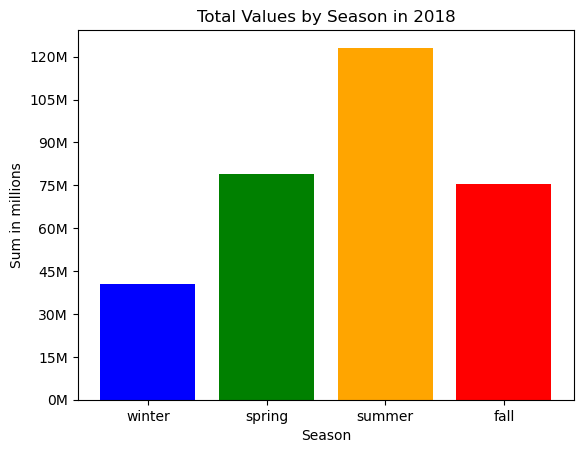

In [81]:
plt.bar(result2018['Season'], result2018['Value'], color=['blue', 'green', 'orange', 'red'])
ax = plt.gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.set_yticklabels([f'{int(x/1e6)}M' for x in ax.get_yticks()])
plt.xlabel('Season')
plt.ylabel('Sum in millions')
plt.title('Total Values by Season in 2018')
plt.show()

Identify seasonal visitation patterns for year 2019

In [82]:
seasondata['Value'] = seasondata['Value'].replace({',': ''}, regex=True).astype(int)
seasondata_2019 = seasondata[seasondata['Year'] == 2019]

In [83]:
season_sum = {'winter': 0, 'spring': 0, 'summer': 0, 'fall': 0}
for index, row in seasondata_2019.iterrows():
    season = row['Season']
    value = row['Value']
    season_sum[season] += value
result2019= pd.DataFrame(list(season_sum.items()), columns=['Season', 'Value'])
result2019

,Season,Value
0,winter,39220863
1,spring,81231908
2,summer,127746245
3,fall,79317603


C:\Users\Sharv-Abhi-Priya\AppData\Local\Temp\ipykernel_5500\3526709094.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(x/1e6)}M' for x in ax.get_yticks()])


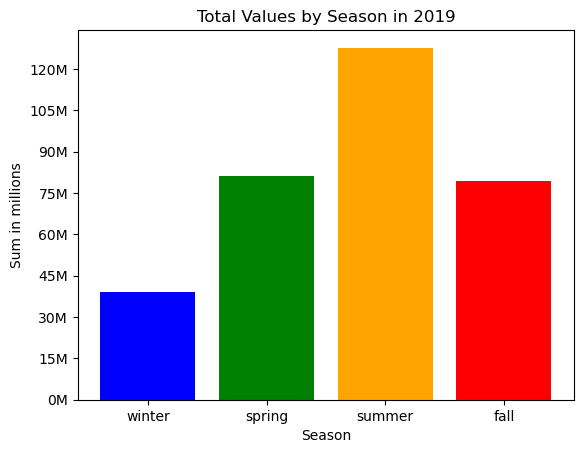

In [84]:
plt.bar(result2019['Season'], result2019['Value'], color=['blue', 'green', 'orange', 'red'])
ax = plt.gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.set_yticklabels([f'{int(x/1e6)}M' for x in ax.get_yticks()])
plt.xlabel('Season')
plt.ylabel('Sum in millions')
plt.title('Total Values by Season in 2019')
plt.show()

Identify seasonal visitation patterns for year 2020

In [85]:
seasondata['Value'] = seasondata['Value'].replace({',': ''}, regex=True).astype(int)
seasondata_2020 = seasondata[seasondata['Year'] == 2020]

In [86]:
season_sum = {'winter': 0, 'spring': 0, 'summer': 0, 'fall': 0}
for index, row in seasondata_2020.iterrows():
    season = row['Season']
    value = row['Value']
    season_sum[season] += value
result2020= pd.DataFrame(list(season_sum.items()), columns=['Season', 'Value'])
result2020

,Season,Value
0,winter,42100243
1,spring,37075185
2,summer,90052245
3,fall,67836659


C:\Users\Sharv-Abhi-Priya\AppData\Local\Temp\ipykernel_5500\2348201562.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(x/1e6)}M' for x in ax.get_yticks()])


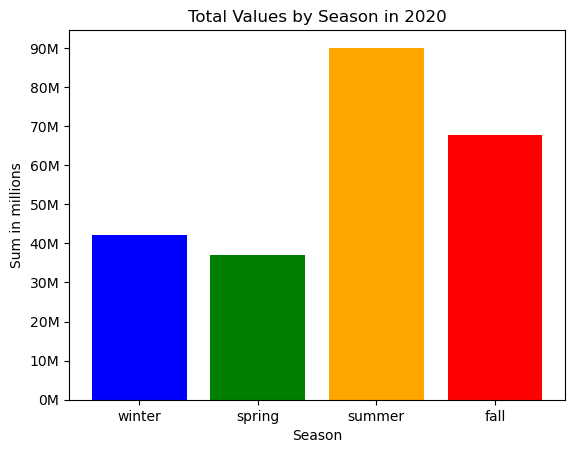

In [87]:
plt.bar(result2020['Season'], result2020['Value'], color=['blue', 'green', 'orange', 'red'])
ax = plt.gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.set_yticklabels([f'{int(x/1e6)}M' for x in ax.get_yticks()])
plt.xlabel('Season')
plt.ylabel('Sum in millions')
plt.title('Total Values by Season in 2020')
plt.show()

Identify seasonal visitation patterns for year 2021

In [88]:
seasondata['Value'] = seasondata['Value'].replace({',': ''}, regex=True).astype(int)
seasondata_2021 = seasondata[seasondata['Year'] == 2021]

In [89]:
season_sum = {'winter': 0, 'spring': 0, 'summer': 0, 'fall': 0}
for index, row in seasondata_2021.iterrows():
    season = row['Season']
    value = row['Value']
    season_sum[season] += value
result2021= pd.DataFrame(list(season_sum.items()), columns=['Season', 'Value'])
result2021

,Season,Value
0,winter,39723092
1,spring,68489595
2,summer,112832908
3,fall,76069811


C:\Users\Sharv-Abhi-Priya\AppData\Local\Temp\ipykernel_5500\639895672.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(x/1e6)}M' for x in ax.get_yticks()])


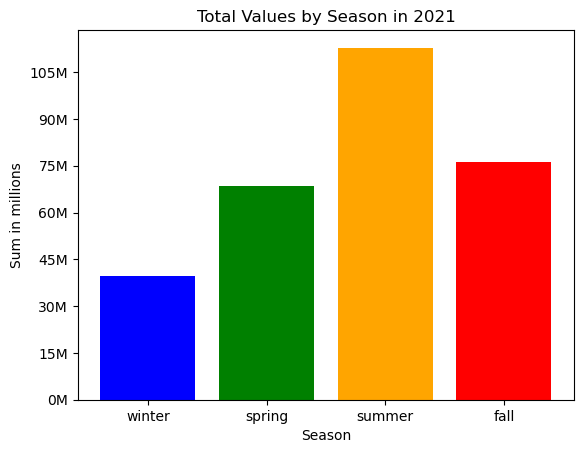

In [90]:
plt.bar(result2021['Season'], result2021['Value'], color=['blue', 'green', 'orange', 'red'])
ax = plt.gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.set_yticklabels([f'{int(x/1e6)}M' for x in ax.get_yticks()])
plt.xlabel('Season')
plt.ylabel('Sum in millions')
plt.title('Total Values by Season in 2021')
plt.show()

Identify seasonal visitation patterns for year 2022

In [91]:
seasondata['Value'] = seasondata['Value'].replace({',': ''}, regex=True).astype(int)
seasondata_2022 = seasondata[seasondata['Year'] == 2022]

In [92]:
season_sum = {'winter': 0, 'spring': 0, 'summer': 0, 'fall': 0}
for index, row in seasondata_2022.iterrows():
    season = row['Season']
    value = row['Value']
    season_sum[season] += value
result2022= pd.DataFrame(list(season_sum.items()), columns=['Season', 'Value'])
result2022

,Season,Value
0,winter,41662839
1,spring,77591047
2,summer,114635405
3,fall,78096707


C:\Users\Sharv-Abhi-Priya\AppData\Local\Temp\ipykernel_5500\17179418.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(x/1e6)}M' for x in ax.get_yticks()])


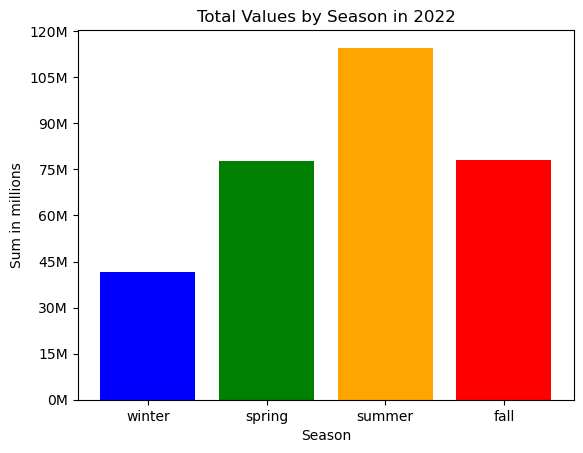

In [93]:
plt.bar(result2022['Season'], result2022['Value'], color=['blue', 'green', 'orange', 'red'])
ax = plt.gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.set_yticklabels([f'{int(x/1e6)}M' for x in ax.get_yticks()])
plt.xlabel('Season')
plt.ylabel('Sum in millions')
plt.title('Total Values by Season in 2022')
plt.show()

Identify seasonal visitation patterns for year 2023

In [94]:
seasondata['Value'] = seasondata['Value'].replace({',': ''}, regex=True).astype(int)
seasondata_2023 = seasondata[seasondata['Year'] == 2023]

In [95]:
season_sum = {'winter': 0, 'spring': 0, 'summer': 0, 'fall': 0}
for index, row in seasondata_2023.iterrows():
    season = row['Season']
    value = row['Value']
    season_sum[season] += value
result2023= pd.DataFrame(list(season_sum.items()), columns=['Season', 'Value'])
result2023

,Season,Value
0,winter,44825887
1,spring,80459258
2,summer,118717255
3,fall,81496246


C:\Users\Sharv-Abhi-Priya\AppData\Local\Temp\ipykernel_5500\643506774.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(x/1e6)}M' for x in ax.get_yticks()])


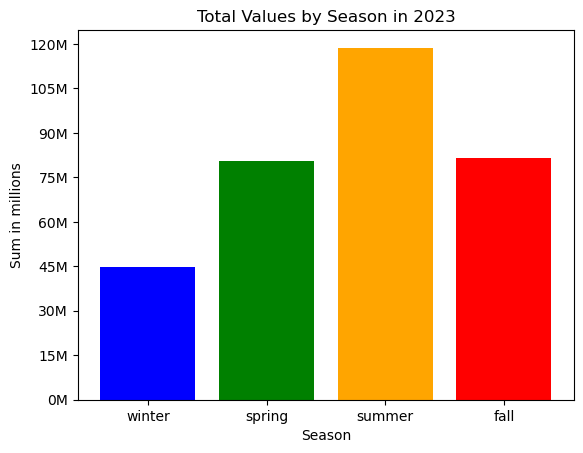

In [96]:
plt.bar(result2023['Season'], result2023['Value'], color=['blue', 'green', 'orange', 'red'])
ax = plt.gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.set_yticklabels([f'{int(x/1e6)}M' for x in ax.get_yticks()])
plt.xlabel('Season')
plt.ylabel('Sum in millions')
plt.title('Total Values by Season in 2023')
plt.show()

In [97]:
seasondata['Visitors in Millions']=seasondata['Value']/1000000

In [98]:
seasondata.rename(columns={'Value':'Visitors'})

,Year,Month,Visitors,Season,Visitors in Millions
0,2018,Jan,12635938,winter,12.635938
1,2018,Mar,21035485,spring,21.035485
2,2018,Feb,13822694,winter,13.822694
3,2018,Apr,25889186,spring,25.889186
4,2018,May,32211085,spring,32.211085
...,...,...,...,...,...
67,2023,Aug,37500130,summer,37.500130
68,2023,Sep,32418448,fall,32.418448
69,2023,Oct,29636427,fall,29.636427
70,2023,Nov,19441371,fall,19.441371


In [99]:
seasondata.to_csv('seasondata.csv', index=False)

Total visitors by season

In [100]:
season_sum = {'winter': 0, 'spring': 0, 'summer': 0, 'fall': 0}
for index, row in seasondata.iterrows():
    season = row['Season']
    value = row['Value']
    season_sum[season] += value
result= pd.DataFrame(list(season_sum.items()), columns=['Season', 'Value'])
result

,Season,Value
0,winter,247885133
1,spring,423982749
2,summer,687135021
3,fall,458389931


Total visitors by month

In [101]:
month_sum = {
    'Jan': 0, 'Feb': 0, 'Mar': 0, 'Apr': 0,
    'May': 0, 'Jun': 0, 'Jul': 0, 'Aug': 0,
    'Sep': 0, 'Oct': 0, 'Nov': 0, 'Dec': 0
}

for index, row in seasondata.iterrows():
    month = row['Month']
    value = row['Value']
    month_sum[month] += value

months = pd.DataFrame(list(month_sum.items()), columns=['Month', 'Value'])
months

,Month,Value
0,Jan,74613962
1,Feb,82252051
2,Mar,120404787
3,Apr,135405252
4,May,168172710
5,Jun,218544749
6,Jul,247745175
7,Aug,220845097
8,Sep,184358416
9,Oct,163128236


Seasonal Pattern (LineGraph)

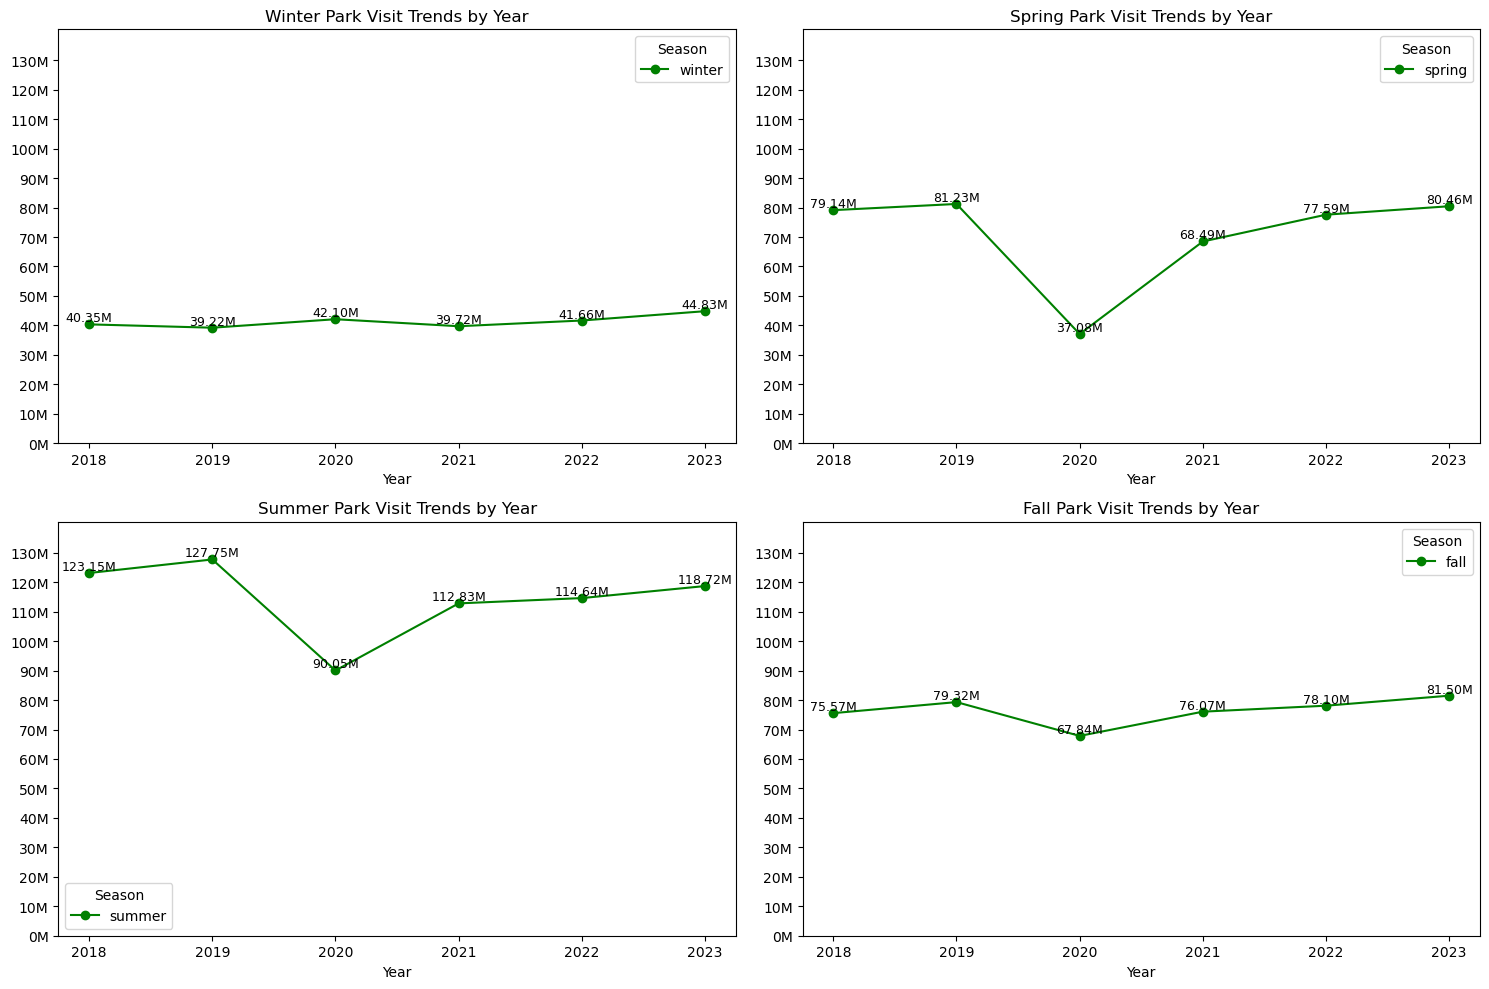

In [102]:
seasondata['Year'] = seasondata['Year'].astype(int)
seasons = ['winter', 'spring', 'summer', 'fall']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()
y_tick_step = 10 
max_y_value = 0

for season in seasons:
    season_data = seasondata[seasondata['Season'] == season]
    season_agg = season_data.groupby('Year')['Visitors in Millions'].sum()
    max_y_value = max(max_y_value, season_agg.max())

y_ticks = range(0, int(max_y_value) + y_tick_step, y_tick_step)

for idx, season in enumerate(seasons):
    season_data = seasondata[seasondata['Season'] == season]
    season_agg = season_data.groupby('Year')['Visitors in Millions'].sum()  

    axes[idx].plot(season_agg.index, season_agg, marker='o', label=season, color='g')

    for i, year in enumerate(season_agg.index):
        value = season_agg.loc[year]
        axes[idx].text(year, value, f'{value:,.2f}M', ha='center', va='bottom', fontsize=9)  

    axes[idx].set_title(f'{season.capitalize()} Park Visit Trends by Year')
    axes[idx].set_xlabel('Year')
    axes[idx].set_ylim(0, max_y_value * 1.1)  
    axes[idx].set_yticks(y_ticks) 
    axes[idx].set_yticklabels([f'{int(x)}M' for x in y_ticks])
    axes[idx].legend(title="Season")

plt.tight_layout()
plt.show()


Seasonal Pattern(Bar Graph)

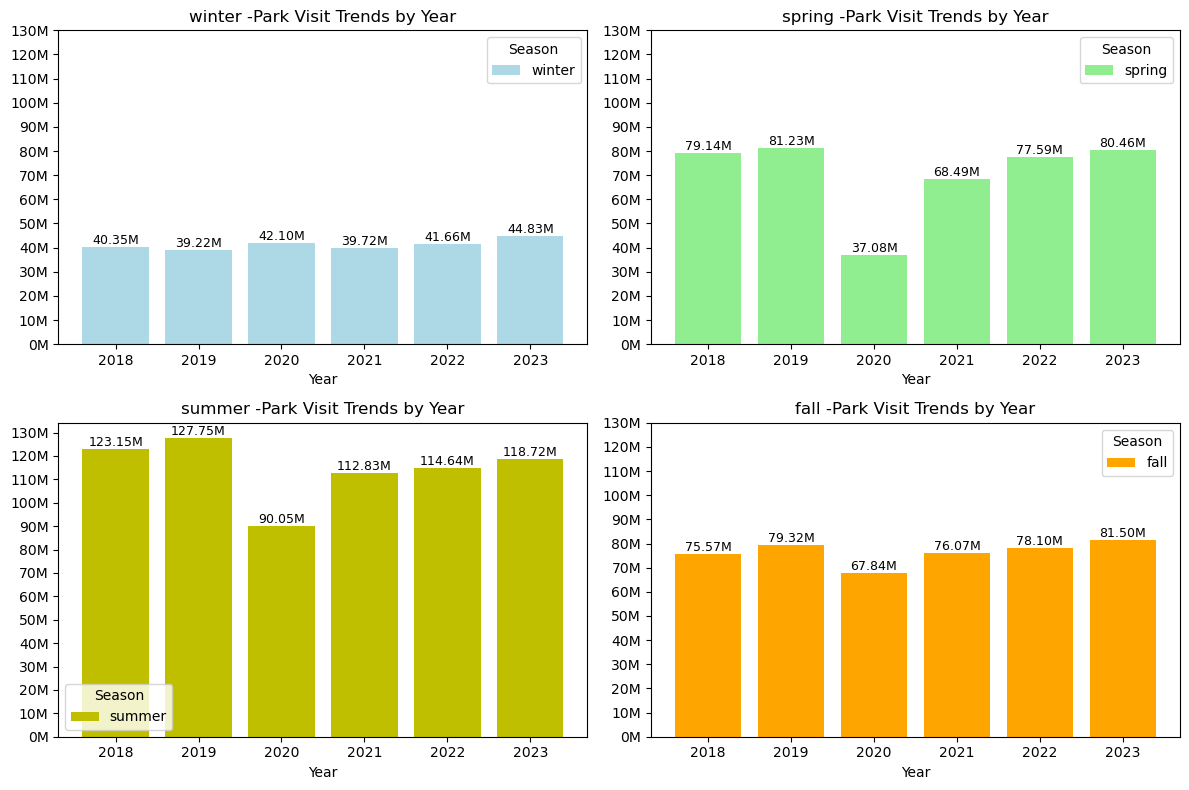

In [103]:
seasondata['Year'] = seasondata['Year'].astype(int)
seasons = ['winter', 'spring', 'summer', 'fall']
season_colors = {
    'winter': '#ADD8E6',    
    'spring': '#90EE90',  
    'summer': 'y',  
    'fall': 'orange' 
}
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
y_tick_gap = 10  
y_value = 0

for season in seasons:
    season_data = seasondata[seasondata['Season'] == season]
    season_agg = season_data.groupby('Year')['Visitors in Millions'].sum()
    y_value = max(y_value, season_agg.max())

y_ticks = range(0, int(y_value) + y_tick_gap, y_tick_gap)

for idx, season in enumerate(seasons):
    season_data = seasondata[seasondata['Season'] == season]
    season_agg = season_data.groupby('Year')['Visitors in Millions'].sum()  
    axes[idx].bar(season_agg.index, season_agg, color=season_colors[season], label=season) 

    for i, year in enumerate(season_agg.index):
        value = season_agg.loc[year]
        axes[idx].text(year, value, f'{value:,.2f}M', ha='center', va='bottom', fontsize=9) 

    axes[idx].set_title(f'{season} -Park Visit Trends by Year')
    axes[idx].set_xlabel('Year') 
    axes[idx].set_yticks(y_ticks)  
    axes[idx].set_yticklabels([f'{int(x)}M' for x in y_ticks]) 
    axes[idx].legend(title="Season")
plt.tight_layout()
plt.savefig('seasongraph.png') 
plt.show()

Recreational Vs Non recreational visitors

In [104]:
parkdata_merged_df['Non-recreation Visitors'] = (parkdata_merged_df['Non-recreation Visitors'].replace(',', '', regex=True).astype(float))

In [105]:
visitors=parkdata_merged_df.groupby('Year')[['Recreation Visitors','Non-recreation Visitors']].sum()

In [106]:
visitors

,Recreation Visitors,Non-recreation Visitors
Year,,
2018,318183206.0,170330752.0
2019,327516623.0,169448644.0
2020,237064318.0,148436337.0
2021,297115401.0,158074682.0
2022,311986008.0,162749152.0
2023,325498650.0,171399946.0
